In [42]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Test").getOrCreate()

In [43]:
data = spark.read.csv("MIDMARKS.csv", header=True)
data.show()
data.printSchema()

+----+-------+---+----+---+----+---+----+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|
+----+-------+---+----+---+----+---+----+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|
|   9|  ALPHA| 10|  18|  A|  20| 19|  15|
|  10|  ALPHA| 18|  19| 20|  20| 20|  15|
|  11|  ALPHA| 17|  18| 20|  18| 20|  18|
|  12|  ALPHA| 20|  20| 20|  20| 19|  16|
|  13|  ALPHA| 16|  18| 11|  15| 19|  15|
|  14|  ALPHA| 17|  17| 18|  11| 15|   9|
|  15|  ALPHA| 19|  20| 20|  20| 18|  12|
|  16|  ALPHA| 13|  18| 17|  19| 16|   9|
|  17|  ALPHA| 15|  17| 18|  17| 17|  13|
|  18|  ALPHA| 11|   8| 18|  15| 19|  15|
|  19|  ALPHA| 14|  12| 16|  16| 20|  14|
|  20|  ALPHA| 19|  17| 20|  20| 20|  18|
+----+-------+---+----+---+----+--

#### HANDLING NULL VALUES

In [45]:
subject_columns = ["DV", "M-II", "PP", "BEEE", "FL", "FIMS"]

In [46]:
from pyspark.sql.functions import col, when

In [47]:
for col_name in subject_columns:
    data = data.withColumn(
        col_name,
        when(col(col_name).isin("A", "AB", "MP", None), 0)
        .otherwise(col(col_name).cast("int"))
    )

In [48]:
data.printSchema()
data.show()

root
 |-- S.NO: string (nullable = true)
 |-- SECTION: string (nullable = true)
 |-- DV: integer (nullable = true)
 |-- M-II: integer (nullable = true)
 |-- PP: integer (nullable = true)
 |-- BEEE: integer (nullable = true)
 |-- FL: integer (nullable = true)
 |-- FIMS: integer (nullable = true)

+----+-------+---+----+---+----+---+----+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|
+----+-------+---+----+---+----+---+----+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|
|   9|  ALPHA| 10|  18|  0|  20| 19|  15|
|  10|  ALPHA| 18|  19| 20|  20| 20|  15|
|  11|  ALPHA| 17|  18| 20|  18| 20|  18|
|  12|  ALPHA| 20|  20| 20|  20| 19|  16|
|  13|  ALPHA| 16|  18| 11|  15| 19|  15|
|  14|  ALPHA| 17|  17| 18|  11

In [49]:
data.groupBy("SECTION").count().show()

+-------+-----+
|SECTION|count|
+-------+-----+
|   GAMA|    1|
|   ZETA|   19|
|   SGMA|    1|
|   NULL|   41|
|   BETA|   60|
|  OMEGA|   60|
|EPSILON|   60|
|  SIGMA|   59|
|  ALPHA|   60|
|  GAMMA|   59|
|  DELTA|   60|
+-------+-----+



In [50]:
data = data.na.fill({"SECTION": "ZETA"})

In [51]:
data.groupBy("SECTION").count().show()

+-------+-----+
|SECTION|count|
+-------+-----+
|   GAMA|    1|
|   ZETA|   60|
|   SGMA|    1|
|   BETA|   60|
|  OMEGA|   60|
|EPSILON|   60|
|  SIGMA|   59|
|  ALPHA|   60|
|  GAMMA|   59|
|  DELTA|   60|
+-------+-----+



In [52]:
from pyspark.sql.functions import when, col
data = data.withColumn(
"SECTION",
when(col("SECTION") == "GAMA", "GAMMA")
.when(col("SECTION") == "SGMA", "SIGMA")
.otherwise(col("SECTION"))
)

In [53]:
data.groupBy("SECTION").count().show()

+-------+-----+
|SECTION|count|
+-------+-----+
|   ZETA|   60|
|   BETA|   60|
|  OMEGA|   60|
|EPSILON|   60|
|  SIGMA|   60|
|  ALPHA|   60|
|  GAMMA|   60|
|  DELTA|   60|
+-------+-----+



In [54]:
data.groupBy("DV").count().show()

+----+-----+
|  DV|count|
+----+-----+
|  12|   27|
|NULL|    3|
|   1|    3|
|  13|   25|
|  16|   48|
|   6|    9|
|   3|    1|
|  20|   52|
|   5|    8|
|  19|   37|
|  15|   45|
|  17|   52|
|   9|   14|
|   4|    3|
|   8|   10|
|   7|    6|
|  10|   22|
|  11|   31|
|  14|   24|
|   2|    4|
+----+-----+
only showing top 20 rows



In [55]:
data = data.na.fill({"DV": "0"})

In [56]:
data.groupBy("DV").count().show()

+---+-----+
| DV|count|
+---+-----+
| 12|   27|
|  1|    3|
| 13|   25|
| 16|   48|
|  6|    9|
|  3|    1|
| 20|   52|
|  5|    8|
| 19|   37|
| 15|   45|
| 17|   52|
|  9|   14|
|  4|    3|
|  8|   10|
|  7|    6|
| 10|   22|
| 11|   31|
| 14|   24|
|  2|    4|
|  0|   12|
+---+-----+
only showing top 20 rows



In [57]:
data.groupBy("M-II").count().show()

+----+-----+
|M-II|count|
+----+-----+
|  12|   23|
|NULL|   10|
|   1|   16|
|  13|   18|
|  16|   16|
|   6|   18|
|   3|   34|
|  20|   44|
|   5|   23|
|  19|   12|
|  15|   24|
|   9|   17|
|  17|   32|
|   4|   22|
|   8|   29|
|   7|   14|
|  10|   19|
|  11|   24|
|  14|   17|
|   2|   12|
+----+-----+
only showing top 20 rows



In [58]:
data = data.na.fill({"M-II": 0})

In [59]:
data.groupBy("M-II").count().show()

+----+-----+
|M-II|count|
+----+-----+
|  12|   23|
|   1|   16|
|  13|   18|
|  16|   16|
|   6|   18|
|   3|   34|
|  20|   44|
|   5|   23|
|  19|   12|
|  15|   24|
|   9|   17|
|  17|   32|
|   4|   22|
|   8|   29|
|   7|   14|
|  10|   19|
|  11|   24|
|  14|   17|
|   2|   12|
|   0|   43|
+----+-----+
only showing top 20 rows



In [60]:
data.groupBy("PP").count().show()

+---+-----+
| PP|count|
+---+-----+
| 12|   28|
|  1|    7|
| 13|   15|
| 16|   28|
|  6|   18|
|  3|   13|
| 20|   70|
|  5|   15|
| 19|   35|
| 15|   26|
| 17|   31|
|  9|   24|
|  4|   10|
|  8|   12|
|  7|   10|
| 10|   19|
| 11|   28|
| 14|   28|
|  2|   13|
|  0|   15|
+---+-----+
only showing top 20 rows



In [61]:
data.groupBy("BEEE").count().show()

+----+-----+
|BEEE|count|
+----+-----+
|  12|   21|
|NULL|    5|
|   1|    3|
|  13|   14|
|  16|   23|
|   6|   14|
|   3|   14|
|  20|   76|
|   5|   10|
|  19|   41|
|  15|   28|
|   9|   19|
|  17|   45|
|   4|   12|
|   8|   13|
|   7|   15|
|  10|   20|
|  11|   31|
|  14|   21|
|   2|    9|
+----+-----+
only showing top 20 rows



In [62]:
data = data.na.fill({"BEEE": 0})

In [63]:
data.groupBy("BEEE").count().show()

+----+-----+
|BEEE|count|
+----+-----+
|  12|   21|
|   1|    3|
|  13|   14|
|  16|   23|
|   6|   14|
|   3|   14|
|  20|   76|
|   5|   10|
|  19|   41|
|  15|   28|
|   9|   19|
|  17|   45|
|   4|   12|
|   8|   13|
|   7|   15|
|  10|   20|
|  11|   31|
|  14|   21|
|   2|    9|
|   0|   21|
+----+-----+
only showing top 20 rows



In [64]:
data.groupBy("FL").count().show()

+----+-----+
|  FL|count|
+----+-----+
|  12|    7|
|NULL|    2|
|  13|   50|
|  16|   15|
|   6|    2|
|  20|  120|
|  19|   34|
|  15|   85|
|  17|    9|
|   9|    3|
|   8|    6|
|   7|    2|
|  10|   55|
|  11|   10|
|  14|   11|
|   0|   11|
|  18|   58|
+----+-----+



In [65]:
data = data.na.fill({"FL": 0})

In [66]:
data.groupBy("FL").count().show()

+---+-----+
| FL|count|
+---+-----+
| 12|    7|
| 13|   50|
| 16|   15|
|  6|    2|
| 20|  120|
| 19|   34|
| 15|   85|
| 17|    9|
|  9|    3|
|  8|    6|
|  7|    2|
| 10|   55|
| 11|   10|
| 14|   11|
|  0|   13|
| 18|   58|
+---+-----+



In [67]:
data.groupBy("FIMS").count().show()

+----+-----+
|FIMS|count|
+----+-----+
|  12|   20|
|NULL|    2|
|   1|    3|
|  13|   36|
|  16|   49|
|   6|    5|
|   3|    6|
|  20|   12|
|   5|    5|
|  19|   34|
|  15|   57|
|   9|   28|
|  17|   40|
|   4|    5|
|   8|   11|
|   7|    5|
|  10|   18|
|  11|   22|
|  14|   40|
|   2|    3|
+----+-----+
only showing top 20 rows



In [68]:
data = data.na.fill({"FIMS": 0})

In [69]:
data.groupBy("FIMS").count().show()

+----+-----+
|FIMS|count|
+----+-----+
|  12|   20|
|   1|    3|
|  13|   36|
|  16|   49|
|   6|    5|
|   3|    6|
|  20|   12|
|   5|    5|
|  19|   34|
|  15|   57|
|   9|   28|
|  17|   40|
|   4|    5|
|   8|   11|
|   7|    5|
|  10|   18|
|  11|   22|
|  14|   40|
|   2|    3|
|   0|   19|
+----+-----+
only showing top 20 rows



#### CALCULATIONS

In [71]:
# TOTAL CALCULATION
from pyspark.sql.functions import col
data = data.withColumn(
    "TOTAL",
    col("DV") + col("M-II") + col("PP") + col("BEEE") + col("FL") + col("FIMS")
)
data.show()

+----+-------+---+----+---+----+---+----+-----+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|TOTAL|
+----+-------+---+----+---+----+---+----+-----+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|   72|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|   84|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|  102|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|   94|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|  111|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|   85|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|   94|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|  105|
|   9|  ALPHA| 10|  18|  0|  20| 19|  15|   82|
|  10|  ALPHA| 18|  19| 20|  20| 20|  15|  112|
|  11|  ALPHA| 17|  18| 20|  18| 20|  18|  111|
|  12|  ALPHA| 20|  20| 20|  20| 19|  16|  115|
|  13|  ALPHA| 16|  18| 11|  15| 19|  15|   94|
|  14|  ALPHA| 17|  17| 18|  11| 15|   9|   87|
|  15|  ALPHA| 19|  20| 20|  20| 18|  12|  109|
|  16|  ALPHA| 13|  18| 17|  19| 16|   9|   92|
|  17|  ALPHA| 15|  17| 18|  17| 17|  13|   97|
|  18|  ALPHA| 11|   8| 18|  15| 19|  15

In [72]:
data.groupBy("TOTAL").count().show()

+-----+-----+
|TOTAL|count|
+-----+-----+
|   31|    3|
|   85|    7|
|   65|    5|
|   53|    2|
|   78|    9|
|  108|    5|
|   34|    2|
|  115|    4|
|  101|    6|
|   81|   13|
|   28|    2|
|   76|    5|
|   26|    4|
|   44|    3|
|  103|   12|
|   91|    8|
|   93|    4|
|  111|    9|
|   47|    2|
|   52|    4|
+-----+-----+
only showing top 20 rows



In [73]:
# PERCENTAGE CALCULATION
data = data.withColumn(
    "percentage",
    (col("total") / 120) * 100
)

from pyspark.sql.functions import round
data = data.withColumn("percentage", round(col("percentage"), 2))

data.show()

+----+-------+---+----+---+----+---+----+-----+----------+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|TOTAL|percentage|
+----+-------+---+----+---+----+---+----+-----+----------+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|   72|      60.0|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|   84|      70.0|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|  102|      85.0|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|   94|     78.33|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|  111|      92.5|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|   85|     70.83|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|   94|     78.33|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|  105|      87.5|
|   9|  ALPHA| 10|  18|  0|  20| 19|  15|   82|     68.33|
|  10|  ALPHA| 18|  19| 20|  20| 20|  15|  112|     93.33|
|  11|  ALPHA| 17|  18| 20|  18| 20|  18|  111|      92.5|
|  12|  ALPHA| 20|  20| 20|  20| 19|  16|  115|     95.83|
|  13|  ALPHA| 16|  18| 11|  15| 19|  15|   94|     78.33|
|  14|  ALPHA| 17|  17| 18|  11| 15|   9|   87|      72.

In [74]:
data.groupBy("percentage").count().show()

+----------+-----+
|percentage|count|
+----------+-----+
|      47.5|    2|
|      70.0|   12|
|       0.0|    7|
|     49.17|    4|
|      3.33|    1|
|     76.67|   10|
|     28.33|    2|
|     98.33|    3|
|     73.33|    5|
|      97.5|    7|
|      67.5|   13|
|      52.5|   10|
|     25.83|    3|
|      82.5|    4|
|     83.33|    6|
|      75.0|    6|
|      92.5|    9|
|     70.83|    7|
|     23.33|    2|
|      35.0|    3|
+----------+-----+
only showing top 20 rows



In [75]:
# GRADE CALCULATION
data = data.withColumn(
    "grade",
    when(col("percentage") >= 90, "A+")
    .when(col("percentage") >= 80, "A")
    .when(col("percentage") >= 70, "B")
    .when(col("percentage") >= 60, "C")
    .when(col("percentage") >= 50, "D")
    .otherwise("F")
)
data.select("total", "percentage", "grade").show()

+-----+----------+-----+
|total|percentage|grade|
+-----+----------+-----+
|   72|      60.0|    C|
|   84|      70.0|    B|
|  102|      85.0|    A|
|   94|     78.33|    B|
|  111|      92.5|   A+|
|   85|     70.83|    B|
|   94|     78.33|    B|
|  105|      87.5|    A|
|   82|     68.33|    C|
|  112|     93.33|   A+|
|  111|      92.5|   A+|
|  115|     95.83|   A+|
|   94|     78.33|    B|
|   87|      72.5|    B|
|  109|     90.83|   A+|
|   92|     76.67|    B|
|   97|     80.83|    A|
|   86|     71.67|    B|
|   92|     76.67|    B|
|  114|      95.0|   A+|
+-----+----------+-----+
only showing top 20 rows



In [76]:
data.groupBy("grade").count().show()

+-----+-----+
|grade|count|
+-----+-----+
|    F|   97|
|    B|   96|
|    D|   71|
|    C|   78|
|    A|   76|
|   A+|   62|
+-----+-----+



#### SKILLS CHECK

In [78]:
#PROGRAMMING SKILLS
data = data.withColumn(
    "Programming skills",
    when(col("PP") >= 18, "Excellent")
    .when(col("PP") >= 15, "Good")
    .otherwise("Poor")
)

data.show()

+----+-------+---+----+---+----+---+----+-----+----------+-----+------------------+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|TOTAL|percentage|grade|Programming skills|
+----+-------+---+----+---+----+---+----+-----+----------+-----+------------------+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|   72|      60.0|    C|              Good|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|   84|      70.0|    B|              Good|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|  102|      85.0|    A|         Excellent|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|   94|     78.33|    B|         Excellent|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|  111|      92.5|   A+|         Excellent|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|   85|     70.83|    B|         Excellent|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|   94|     78.33|    B|         Excellent|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|  105|      87.5|    A|         Excellent|
|   9|  ALPHA| 10|  18|  0|  20| 19|  15|   82|     68.33|    C|            

In [79]:
#DA SKILLS
data = data.withColumn(
    "DA SKILLS",
    when(col("DV") >= 18, "Excellent")
    .when(col("DV") >= 15, "Good")
    .otherwise("Poor")
)
data.show()

+----+-------+---+----+---+----+---+----+-----+----------+-----+------------------+---------+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|TOTAL|percentage|grade|Programming skills|DA SKILLS|
+----+-------+---+----+---+----+---+----+-----+----------+-----+------------------+---------+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|   72|      60.0|    C|              Good|     Poor|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|   84|      70.0|    B|              Good|Excellent|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|  102|      85.0|    A|         Excellent|Excellent|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|   94|     78.33|    B|         Excellent|     Good|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|  111|      92.5|   A+|         Excellent|Excellent|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|   85|     70.83|    B|         Excellent|     Good|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|   94|     78.33|    B|         Excellent|     Good|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|  105|      87.5|  

#### VISUAL REPRESENTATION

In [80]:
pandas_df=data.toPandas()

In [81]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.NO                480 non-null    object 
 1   SECTION             480 non-null    object 
 2   DV                  480 non-null    int32  
 3   M-II                480 non-null    int32  
 4   PP                  480 non-null    int32  
 5   BEEE                480 non-null    int32  
 6   FL                  480 non-null    int32  
 7   FIMS                480 non-null    int32  
 8   TOTAL               480 non-null    int32  
 9   percentage          480 non-null    float64
 10  grade               480 non-null    object 
 11  Programming skills  480 non-null    object 
 12  DA SKILLS           480 non-null    object 
dtypes: float64(1), int32(7), object(5)
memory usage: 35.8+ KB


In [120]:
df=pandas_df

In [122]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [124]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [128]:
import warnings
warnings.filterwarnings('ignore')

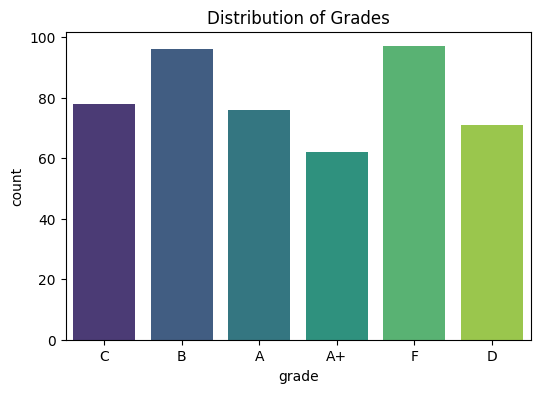

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Distribution of grades (Column 10)
plt.figure(figsize=(6,4))
sns.countplot(x='grade', data=df, palette="viridis")
plt.title("Distribution of Grades")
plt.show()

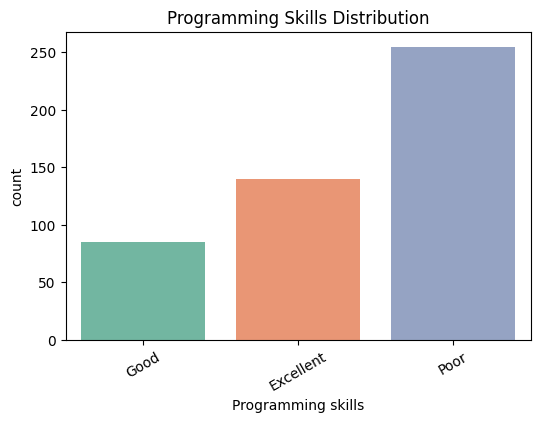

In [132]:
# 2. Programming skills vs count (Column 11)
plt.figure(figsize=(6,4))
sns.countplot(x='Programming skills', data=df, palette="Set2")
plt.title("Programming Skills Distribution")
plt.xticks(rotation=30)
plt.show()

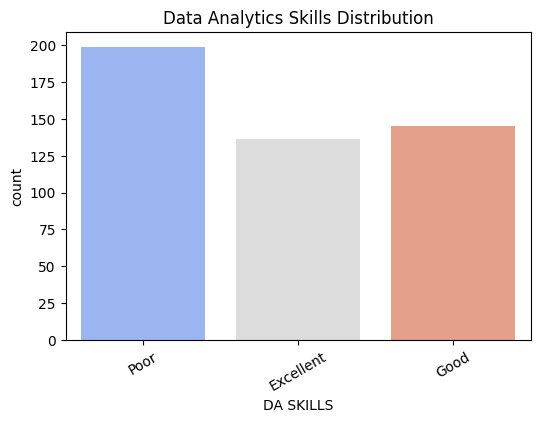

In [134]:
# 3. DA Skills vs count (Column 12)
plt.figure(figsize=(6,4))
sns.countplot(x='DA SKILLS', data=df, palette="coolwarm")
plt.title("Data Analytics Skills Distribution")
plt.xticks(rotation=30)
plt.show()

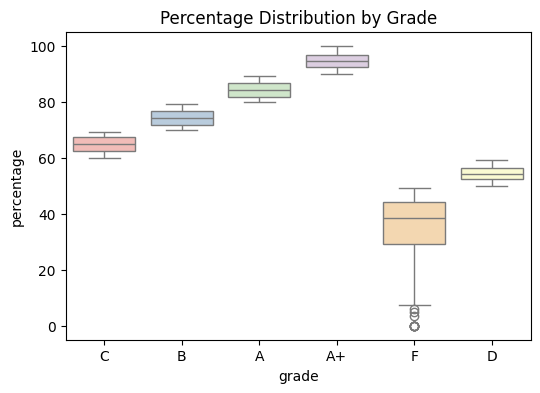

In [136]:
# 4. Percentage distribution across grades (boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(x='grade',y='percentage', data=df, palette="Pastel1")
plt.title("Percentage Distribution by Grade")
plt.show()

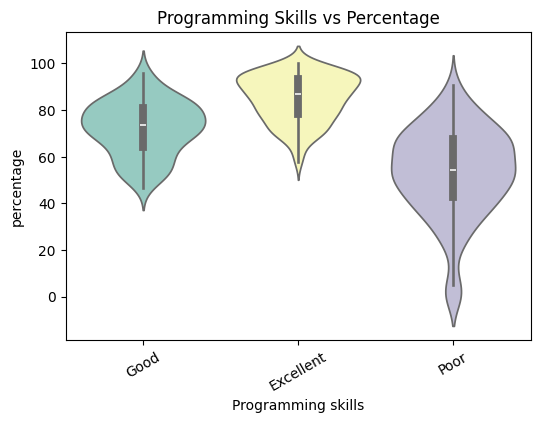

In [138]:
# 5. Compare Programming skills with percentage
plt.figure(figsize=(6,4))
sns.violinplot(x='Programming skills', y='percentage', data=df, palette="Set3")
plt.title("Programming Skills vs Percentage")
plt.xticks(rotation=30)
plt.show()

In [140]:
import pandas as pd

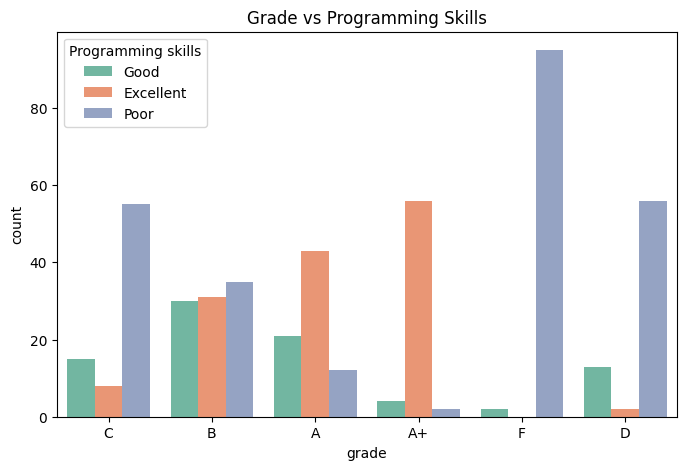

In [142]:
plt.figure(figsize=(8,5))
sns.countplot(x='grade', hue='Programming skills', data=df, palette="Set2")
plt.title("Grade vs Programming Skills")
plt.show()

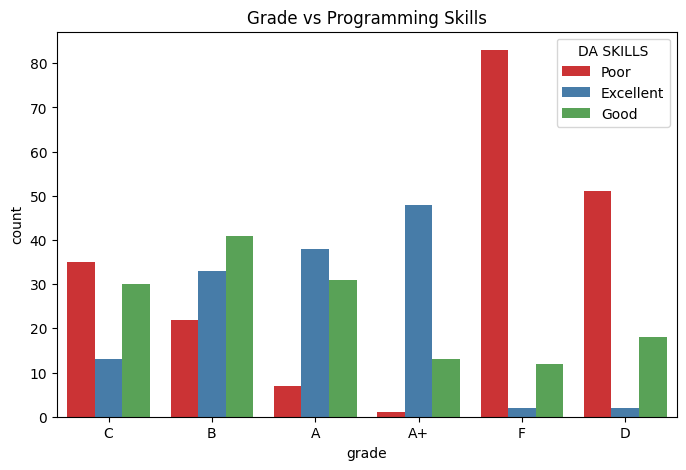

In [144]:
plt.figure(figsize=(8,5))
sns.countplot(x='grade', hue='DA SKILLS', data=df, palette="Set1")
plt.title("Grade vs Programming Skills")
plt.show()

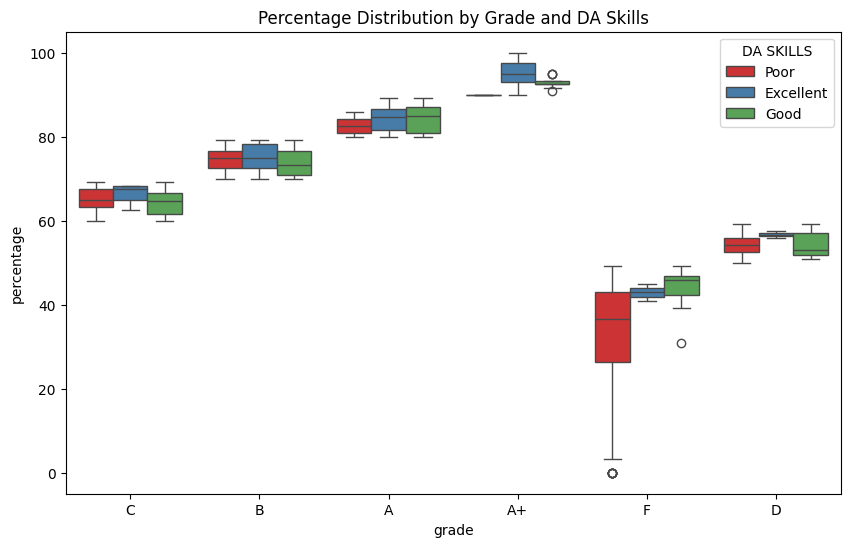

In [146]:
plt.figure(figsize=(10,6))
sns.boxplot(x='grade',y='percentage', hue='DA SKILLS', data=df, palette="Set1")
plt.title("Percentage Distribution by Grade and DA Skills")
plt.show()

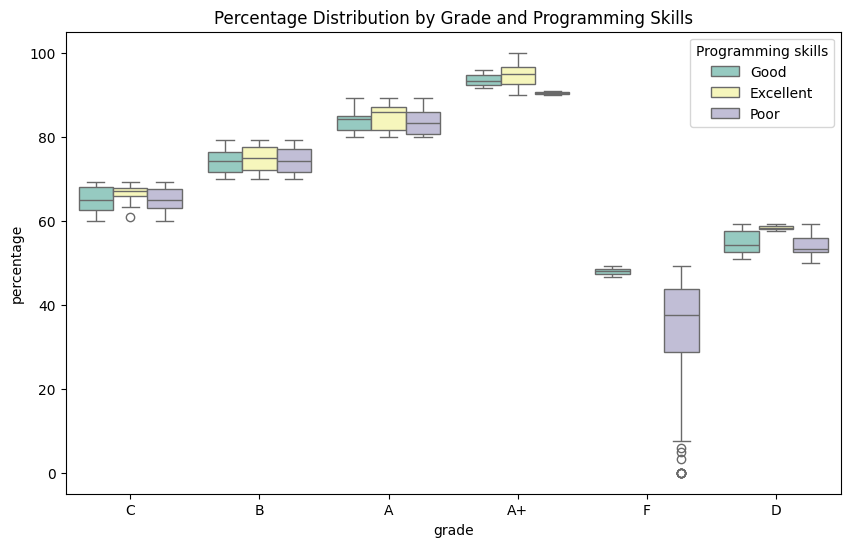

In [148]:
plt.figure(figsize=(10,6))
sns.boxplot(x='grade',y='percentage', hue='Programming skills', data=df, palette="Set3")
plt.title("Percentage Distribution by Grade and Programming Skills")
plt.show()

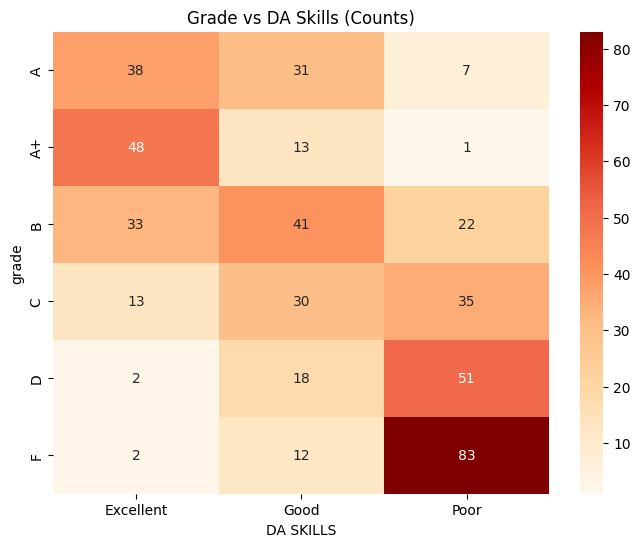

In [150]:
cross_da = pd.crosstab(df['grade'], df['DA SKILLS'])
plt.figure(figsize=(8,6))
sns.heatmap(cross_da, annot=True, cmap="OrRd", fmt="d")
plt.title("Grade vs DA Skills (Counts)")
plt.show()